In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

from scipy import stats

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

import sklearn.tree as tree

from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

PAT predicitions from 2021

In [87]:
df = pd.read_csv("INV.csv")

In [88]:
df.head()

,InvoiceNumber,InvoiceDate,PONumber,ManufacturerName,CustomerName,Value,Receivable,Received,DueDate,PaymentDate,...,PATdays,DaysClass,PATdiff,PATclass,PATweek,ActualWeek,DaysClassNum,PATclassNum,PATweekNum,ActualWeekNum
0,3134609 3137016 3138761,1/1/2021,S5506340,Holm Lighting,QED Loveland,6655.50,0.00,6655.50,3/2/2021,2/15/2021,...,7,NextMonth,38,ThisMonth,ThisWeek,7Week,2,1,1,7
1,432151543,1/2/2021,378072603,Hubbell Lighting,Winsupply Rock Springs Wy.,25.54,-0.01,25.55,2/1/2021,2/5/2021,...,14,NextMonth,20,ThisMonth,NextWeek,5Week,2,1,2,5
2,18404,1/4/2021,20090256448,3G Lighting,Specification Credit,35.84,-0.16,36.00,5/4/2021,1/18/2021,...,7,ThisMonth,7,ThisMonth,ThisWeek,NextWeek,1,1,1,2
3,577735,1/4/2021,1872KB997781D,Barron Lighting Group,CED Denver,172.63,0.00,172.63,2/3/2021,2/11/2021,...,35,NextMonth,3,NextMonth,5Week,6Week,2,2,5,6
4,432154892,1/4/2021,1126GR949627S,Columbia,All Phase Electric Supply CS,46.01,-0.01,46.02,2/3/2021,2/5/2021,...,28,NextMonth,4,ThisMonth,4Week,5Week,2,1,4,5


In [89]:
PAT = df['PATdays']

In [90]:
Actual = df['ActualDays']

In [91]:
Diff = Actual - PAT

In [92]:
Diff

0       38
1       20
2        7
3        3
4        4
        ..
2008     1
2009   -42
2010    -7
2011    -7
2012    -7
Length: 2013, dtype: int64

<AxesSubplot:>

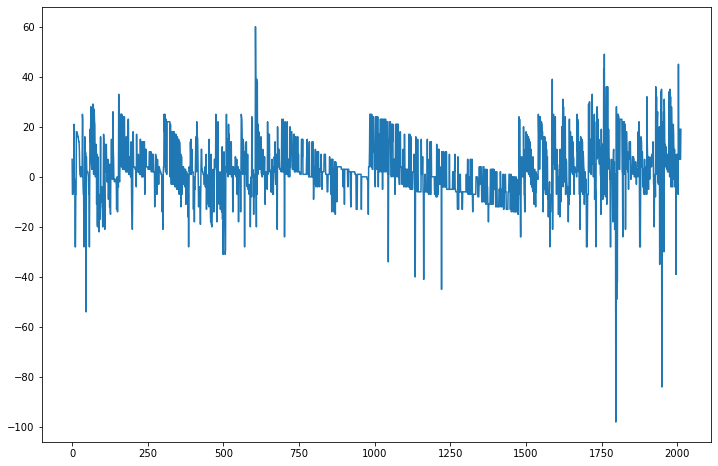

In [35]:
Diff.plot()

In [8]:
Diff.mean()

2.4302036761053154

In [10]:
df.groupby("ManufacturerName")["PATdays"].mean().sort_values(ascending = False)

ManufacturerName
Delray Lighting                             70.000000
Finelite                                    56.777778
Pinnacle Lighting                           47.250000
TMS Lighting                                45.500000
Delta Light USA                             35.000000
ConTech Lighting                            30.362500
MixMatch Lighting                           28.000000
ARON Lighting, LLC                          28.000000
Lightnet USA                                28.000000
None                                        25.869565
Leotek Electronics USA LLC                  25.200000
Trace-Lite                                  24.500000
Kenall Lighting                             24.370370
Exitronix                                   24.000000
Assurance Emergency Lighting                22.166667
Lexington Standards                         22.076923
Bega Lighting                               21.155556
Oxygen Lighting                             21.000000
Valmont    

In [11]:
df.groupby("ManufacturerName")["ActualDays"].mean().sort_values(ascending = False)

ManufacturerName
Finelite                                    64.222222
Lumos Custom                                49.500000
MixMatch Lighting                           46.000000
Holm Lighting                               45.000000
W. J. Whatley                               45.000000
ARON Lighting, LLC                          44.500000
Tempo Industries                            43.000000
Delray Lighting                             39.000000
Leotek Electronics USA LLC                  35.100000
Assurance Emergency Lighting                35.000000
Lexington Standards                         33.076923
Primus Lighting                             33.000000
Trace-Lite                                  30.750000
Lumetta                                     28.500000
None                                        28.260870
RP Lighting                                 27.823529
Valmont                                     27.204082
Kenall Lighting                             26.981481
ConTech Lig

In [12]:
mfg_avg_pat = df.groupby("ManufacturerName")["PATdays"].mean().sort_values(ascending = False)

In [13]:
mfg_avg_actual = df.groupby("ManufacturerName")["ActualDays"].mean().sort_values(ascending = False)

In [14]:
df.groupby("CustomerName")["PATdays"].mean().sort_values(ascending = False)

CustomerName
CED Boise                                 70.0
Colorado Electric Supply-DNC              63.0
Rexel - Ft Collins #7619                  35.0
CED Gunnison                              35.0
Interstate Meridian                       28.0
                                          ... 
CED Hamilton                               7.0
Electrical Wholesale Supply Driggs         7.0
Electrical Wholesale Supply - Bozeman      7.0
Dealers Electric Supply                    7.0
Electrical Wholesale Supply - Missoula     7.0
Name: PATdays, Length: 142, dtype: float64

In [17]:
df.groupby("CustomerName")["ActualDays"].mean().sort_values(ascending = False)

CustomerName
Crum Electric - Denver                  42.0
Polestar Distributors                   39.0
Crescent Electric Supply- Kalispell     37.5
City of Greenwood Village - D           37.0
CED Helena                              36.0
                                        ... 
CED Billings                             8.0
CED Gunnison                             6.0
CED Hamilton                             0.0
Regional Transportation District - D     0.0
Rexel - Pueblo #3223                     0.0
Name: ActualDays, Length: 142, dtype: float64

In [15]:
customer_avg_pat = df.groupby("CustomerName")["PATdays"].mean().sort_values(ascending = False)

In [16]:
customer_avg_actual = df.groupby("CustomerName")["ActualDays"].mean().sort_values(ascending = False)

In [18]:
print(customer_avg_actual - customer_avg_pat)

CustomerName
All Phase Electric Supply CS    0.485714
All Phase Electric Supply GJ    3.666667
All Phase Electric Supply GS    3.470588
American Electric - Alamosa     4.000000
American Electric - Pueblo      0.923077
                                  ...   
Winlectric - Cheyenne           0.687500
Winlectric - Ft. Collins        1.333333
Winlectric - Northglenn         9.695652
Winsupply Rock Springs Wy.      2.866667
XCEL Energy - D                 8.000000
Length: 142, dtype: float64


In [19]:
mfg_avg_actual - mfg_avg_pat

ManufacturerName
3G Lighting                                  0.000000
ARON Lighting, LLC                          16.500000
Alphabet Lighting, A Ledrabrands Company    -7.000000
Architectural Area Lighting                  1.163636
Assurance Emergency Lighting                12.833333
Barron Lighting Group                        3.481481
Beacon Products                             -4.533333
Bega Lighting                                1.266667
Beulux                                      10.500000
Columbia                                     5.087336
Compass Life Safety                          1.871795
ConTech Lighting                            -3.687500
Delray Lighting                            -31.000000
Delta Light USA                            -29.000000
Dual-Lite                                    2.546512
Exitronix                                    1.857143
Finelite                                     7.444444
Fluxwerx Illumination Inc.                  16.000000
Holm Lighti

In [24]:
len(df['CustomerName'].unique())

142

In [25]:
len(df['ManufacturerName'].unique())

51

In [29]:
mfg_df = df.groupby(by="ManufacturerName")["Value"].sum()

<AxesSubplot:xlabel='ManufacturerName'>

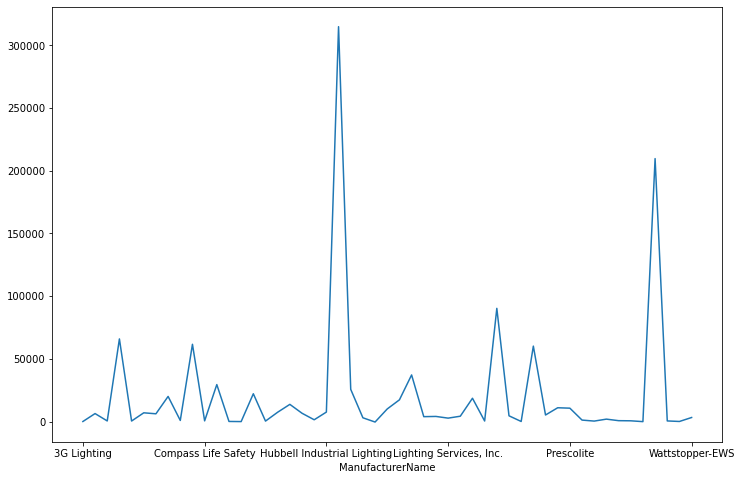

In [27]:
mfg_df.plot()

In [32]:
df = df.groupby("PaymentDate")


In [34]:
df.head()

,InvoiceNumber,InvoiceDate,PONumber,ManufacturerName,CustomerName,Value,Receivable,Received,DueDate,PaymentDate,PATPayDate,ActualDays,PATdays,DaysClass
0,18404,2021-01-04,20090256448,3G Lighting,Specification Credit,35.84,-0.16,36.00,2021-05-04,2021-01-18,2021-01-11,14,7,ThisMonth
1,18399,2021-01-18,8068SJ9963063D,3G Lighting,Specification Credit,37.13,-0.62,37.75,2021-05-18,2021-01-18,2021-01-25,0,7,ThisMonth
2,101234,2021-01-21,4519985190,"Alphabet Lighting, A Ledrabrands Company",Specification Credit,324.06,-1.39,325.45,2021-04-06,2021-01-21,2021-01-28,0,7,ThisMonth
3,101233,2021-01-21,4519985191,"Alphabet Lighting, A Ledrabrands Company",Specification Credit,196.12,0.02,196.10,2021-04-06,2021-01-21,2021-01-28,0,7,ThisMonth
4,432165774,2021-01-05,S129174136,Architectural Area Lighting,Rexel - Ft Collins #7619,3737.25,-0.01,3737.26,2021-02-04,2021-02-05,2021-02-09,31,35,NextMonth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,139536,2021-01-19,BOTTLEWORKS,TMS Lighting,Specification Credit,173.50,-0.20,173.70,2021-05-19,2021-01-19,2021-01-26,0,7,ThisMonth
2006,1499426,2021-02-03,S010597882,Watt Stopper,Specification Credit,2.13,0.00,2.13,2021-04-04,2021-02-17,2021-02-10,14,7,ThisMonth
2007,1499846,2021-02-03,4703249148,Watt Stopper,Specification Credit,61.77,-2.40,64.17,2021-04-04,2021-02-17,2021-02-10,14,7,ThisMonth
2009,EWS01012021CO,2021-01-06,EWS11012020CO,Wattstopper-EWS,Specification Credit,1437.86,0.00,1437.86,2021-01-06,2021-01-20,2021-01-13,14,7,ThisMonth


In [38]:
Diff.groupby(df["ManufacturerName"]).mean()

TypeError: 'SeriesGroupBy' object is not callable

In [39]:
#the mean Actual Days 
Diff.mean()

2.4302036761053154

In [40]:
#df0 = df[["ManufacturerName", "CustomerName", "ActualDays", "PATdays", "PaymentDate"]]

In [42]:
df0.head()

,ManufacturerName,CustomerName,ActualDays,PATdays,PaymentDate
0,3G Lighting,Specification Credit,14,7,2021-01-18
1,3G Lighting,Specification Credit,0,7,2021-01-18
2,"Alphabet Lighting, A Ledrabrands Company",Specification Credit,0,7,2021-01-21
3,"Alphabet Lighting, A Ledrabrands Company",Specification Credit,0,7,2021-01-21
4,Architectural Area Lighting,Rexel - Ft Collins #7619,31,35,2021-02-05
...,...,...,...,...,...
1950,TMS Lighting,Specification Credit,0,7,2021-01-19
2006,Watt Stopper,Specification Credit,14,7,2021-02-17
2007,Watt Stopper,Specification Credit,14,7,2021-02-17
2009,Wattstopper-EWS,Specification Credit,14,7,2021-01-20


In [50]:
df0 = df

In [51]:
df0

,InvoiceNumber,InvoiceDate,PONumber,ManufacturerName,CustomerName,Value,Receivable,Received,DueDate,PaymentDate,PATPayDate,ActualDays,PATdays,DaysClass,PATdiff
0,3134609 3137016 3138761,1/1/2021,S5506340,Holm Lighting,QED Loveland,6655.50,0.00,6655.50,3/2/2021,2/15/2021,1/8/2021,45,7,NextMonth,38.0
1,432151543,1/2/2021,378072603,Hubbell Lighting,Winsupply Rock Springs Wy.,25.54,-0.01,25.55,2/1/2021,2/5/2021,1/16/2021,34,14,NextMonth,20.0
2,18404,1/4/2021,20090256448,3G Lighting,Specification Credit,35.84,-0.16,36.00,5/4/2021,1/18/2021,1/11/2021,14,7,ThisMonth,7.0
3,577735,1/4/2021,1872KB997781D,Barron Lighting Group,CED Denver,172.63,0.00,172.63,2/3/2021,2/11/2021,2/8/2021,38,35,NextMonth,3.0
4,432154892,1/4/2021,1126GR949627S,Columbia,All Phase Electric Supply CS,46.01,-0.01,46.02,2/3/2021,2/5/2021,2/1/2021,32,28,NextMonth,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,CINV13575,3/9/2021,SC0305212JVG,None,Service Customer N,474.19,0.00,474.19,4/9/2021,3/17/2021,3/16/2021,8,7,ThisMonth,1.0
2009,99642,3/12/2021,S5587856,Pinnacle Lighting,QED Denver,125.00,0.00,125.00,5/11/2021,3/12/2021,4/23/2021,0,42,ThisMonth,-42.0
2010,POS03012021,3/15/2021,POS02012021CO,Hubbell Lighting,Specification Credit,13.42,0.00,13.42,4/14/2021,3/15/2021,3/22/2021,0,7,ThisMonth,-7.0
2011,POS03012021ID,3/15/2021,POS02012021ID,Hubbell Lighting,Specification Credit,5.45,0.00,5.45,4/14/2021,3/15/2021,3/22/2021,0,7,ThisMonth,-7.0


In [55]:
dfmfg = df[["ManufacturerName", "PATdiff", "PaymentDate", "Value"]]


In [56]:
dfcust = df[["CustomerName", "PATdiff", "PaymentDate", "Value"]]

In [62]:
#didnt work right
#dfmfg.groupby(dfmfg(by="PaymentDate")["Manufacturer"]).sum().sort_values(ascending = False)

In [63]:
#another fail
#dfmfg = dfmfg(pd.to_datetime(dfmfg.index))

In [64]:
#using sklearn.metrics accuracy score
y_pred = df[['PATdays']]
y_true = df[['ActualDays']]


In [65]:
accuracy_score(y_true, y_pred)

0.06706408345752608

In [66]:
#this score returns the number of correctly guessed days
accuracy_score(y_true, y_pred, normalize=False)

135

In [67]:
#if we wanted to replace the class of days, weeks etc 
#seeing what variables are listed as objects
#obj_df = df0.select_dtypes(include=['object']).copy()
#obj_df.head()
#cleanup_nums = {"DaysClass":     {"ThisMonth": 1, "NextMonth": 2, "60to90days": 3}}
#obj_df = obj_df.replace(cleanup_nums)
#obj_df.head()

In [96]:
#getting the accuracy of the monthly predictions
y_pred_monthly = df[['PATclassNum']]
y_true_monthly = df[['DaysClassNum']]

In [97]:
#accuracy score determined by (total positive + total negative)/(tp +fp +tn + fn)
accuracy_score(y_true_monthly, y_pred_monthly)

0.8618976651763537

In [98]:
accuracy_score(y_true_monthly, y_pred_monthly, normalize=False)

1735

In [106]:
#balanced accuracy score
#this is what should really be used for imbalanced datasets
#this function avoids inflated performance estimates on imbalanced datasets. 
#the macro avg of recall scores per class; raw accuracy where each sample is weighted acc. to the inverse prevalence of its true class
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true_monthly, y_pred_monthly)

0.5819823971875906

In [107]:
from sklearn.metrics import cohen_kappa_score

In [108]:
#not the best to use
#should only be used when 2 raters each rate one trial on each sample
#or one rater rates two trials on each sample
#measures interrater reliability (interobserver agreement).
#interrater reliability or precision happens when your data rates or collectors give the same score to the same data item
cohen_kappa_score(y_true_monthly, y_pred_monthly)

0.27610253836392395

In [141]:
from sklearn.metrics import hamming_loss

#the hamming loss is the fraction of labels that are incorrectly predicted
#the lower the better

In [142]:
hamming_loss(y_true_monthly, y_pred_monthly)

0.1381023348236463

In [136]:
from sklearn.metrics import classification_report

In [137]:
target_names = ['1', '2', '3', '4']

print(classification_report(y_true_monthly, y_pred_monthly, target_names=target_names))

              precision    recall  f1-score   support

           1       0.88      0.97      0.92      1717
           2       0.59      0.22      0.32       287
           3       0.36      0.56      0.43         9
           4       0.00      0.00      0.00         0

    accuracy                           0.86      2013
   macro avg       0.46      0.44      0.42      2013
weighted avg       0.84      0.86      0.84      2013



In [144]:
from sklearn.metrics import roc_auc_score

In [ ]:
#compute area under the receiver operating characteristic curve


In [122]:
from sklearn.metrics import jaccard_score

In [127]:
#jaccard index (intersection/union) of 2 label sets is used to compare a set of predicted labels for a sample
#to a corresponding set of labels in y_true
#arguments:
#sklearn.metrics.jaccard_score(y_true, y_pred, *, labels=None, pos_label=1,average='binary', sample_weight=None,
#zero_division='warn')
#average arguments: binary-use when both labels are binary, micro-calc global metrics by counting total true +, false - and false +, 
#macro- calc metrics for each label, and find their unweighted mean and does not take label imbalance into account, 
#weighted-calc metrics for each label and find their avg, weighted by support (#true instances for ea label) and alters macro to acct for label imbalance, 
#samples- calc metrics for each instance and find their avg
jaccard_score(y_true_monthly, y_pred_monthly, average='macro')

0.33177006938592934

In [128]:
jaccard_score(y_true_monthly, y_pred_monthly, average='weighted')

0.7606320874804362

In [130]:
jaccard_score(y_true_monthly, y_pred_monthly, average='micro')

0.7573112178088172

In [131]:
jaccard_score(y_true_monthly, y_pred_monthly, average=None)

array([0.85839341, 0.19090909, 0.27777778, 0.        ])

In [135]:
#researched top_k_accuracy and it is not a good fit for this problem either

In [110]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true_monthly, y_pred_monthly)

array([[1667,   43,    6,    1],
       [ 221,   63,    3,    0],
       [   4,    0,    5,    0],
       [   0,    0,    0,    0]], dtype=int64)

In [113]:
#confusion matrix can be normalized in 3 diff ways: pred, true and all which will 
#divide the counts by the sum of each columns, rows, or the entire matrix, respectively
confusion_matrix(y_true_monthly, y_pred_monthly, normalize='all')

array([[8.28117238e-01, 2.13611525e-02, 2.98062593e-03, 4.96770989e-04],
       [1.09786388e-01, 3.12965723e-02, 1.49031297e-03, 0.00000000e+00],
       [1.98708395e-03, 0.00000000e+00, 2.48385494e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [80]:
y_pred_weekly = df[['PATweekNum']]
y_true_weekly = df[['ActualWeekNum']]

In [81]:
accuracy_score(y_true_weekly, y_pred_weekly)

0.2637853949329359

In [82]:
accuracy_score(y_true_weekly, y_pred_weekly, normalize=False)

531

In [121]:
balanced_accuracy_score(y_true_weekly, y_pred_weekly)

0.21298082265134607

In [138]:
target_names1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14']

print(classification_report(y_true_weekly, y_pred_weekly, target_names=target_names1))

              precision    recall  f1-score   support

           1       0.15      0.58      0.23       170
           2       0.31      0.23      0.26       446
           3       0.33      0.36      0.34       473
           4       0.33      0.27      0.30       460
           5       0.31      0.08      0.12       359
           6       0.62      0.07      0.12        74
           7       0.00      0.00      0.00        14
           8       0.40      0.33      0.36         6
           9       0.00      0.00      0.00         3
          10       0.38      0.43      0.40         7
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

    accuracy                           0.26      2013
   macro avg       0.22      0.18      0.16      2013
weighted avg       0.31      0.26      0.26      2013



In [145]:
#classification report understanding
#the precision is the ratio true positives/ (true positives + false positives); the ability of the classifier not to label as positive a sample that is negative
#the recall is the ration true positives/(true positives + false negatives); the ability of the classifier to find all the positive samples
#the F beta score is the weighted harmonic mean of hte precision and recall, where fbeta reaches best value at 1 and worst at 0
#Fbeta weights recall more than precision by a factor of beta; beta = 1 means that precision and recall are the equally important
#fbeta = (1+beta^2)*((precision*recall)/(beta62*precision+recall))
#support is the number of occurrences of each class in y_true

In [139]:
print(classification_report(y_true_weekly, y_pred_weekly,labels=[1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.15      0.58      0.23       170
           2       0.31      0.23      0.26       446
           3       0.33      0.36      0.34       473
           4       0.33      0.27      0.30       460
           5       0.31      0.08      0.12       359
           6       0.62      0.07      0.12        74
           7       0.00      0.00      0.00        14
           8       0.40      0.33      0.36         6
           9       0.00      0.00      0.00         3
          10       0.38      0.43      0.40         7
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

    accuracy                           0.26      2013
   macro avg       0.22      0.18      0.16      2013
weighted avg       0.31      0.26      0.26      2013



In [153]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_true_monthly, y_pred_monthly, average='macro')

(0.4581401759714616, 0.43648679789069295, 0.41979872570298266, None)

In [155]:
precision_recall_fscore_support(y_true_monthly, y_pred_monthly, average='weighted')

(0.8378544799774664, 0.8618976651763537, 0.8356163288788687, None)

In [157]:
from sklearn.metrics import f1_score

#f1 score known as the balanced f-score or f-measure
#can be interpreted as a weighted average of the precision and recall where f1 score reaches its best value at 1 and worst value at 0
# F1 = 2 &(precision *recall) / (precision + recall)

f1_score(y_true_monthly, y_pred_monthly, average='macro')

0.41979872570298266

In [156]:
f1_score(y_true_monthly, y_pred_monthly, average='weighted')

0.8356163288788687

In [152]:
from sklearn.metrics import roc_auc_score
#this one wont work unless we convert all of the values to probablities first
#roc_auc_score(y_true_monthly, y_pred_monthly, average='macro', multi_class='ovo')

In [83]:
mfg_df_actual_days = df.groupby(by="ManufacturerName")["ActualDays"].mean()
mfg_df_pat_diff = df.groupby(by="ManufacturerName")["PATdiff"].mean()

In [103]:
#y_pred_monthly_mfg = df.groupby('ManufacturerName')['PATclassNum']
#y_true_monthly_mfg = df.groupby('ManufacturerName')['DaysClassNum']

In [104]:
#accuracy_score(y_true_monthly_mfg, y_pred_monthly_mfg)

In [84]:
mfg_df_pat_diff

ManufacturerName
3G Lighting                                  0.000000
ARON Lighting, LLC                          16.500000
Alphabet Lighting, A Ledrabrands Company    -7.000000
Architectural Area Lighting                  1.163636
Assurance Emergency Lighting                12.833333
Barron Lighting Group                        3.481481
Beacon Products                             -4.533333
Bega Lighting                                1.266667
Beulux                                      10.500000
Columbia                                     5.087336
Compass Life Safety                          1.871795
ConTech Lighting                            -3.687500
Delray Lighting                            -31.000000
Delta Light USA                            -29.000000
Dual-Lite                                    2.546512
Exitronix                                    1.857143
Finelite                                     7.444444
Fluxwerx Illumination Inc.                  16.000000
Holm Lighti

In [85]:
mfg_df_actual_days

ManufacturerName
3G Lighting                                  7.000000
ARON Lighting, LLC                          44.500000
Alphabet Lighting, A Ledrabrands Company     0.000000
Architectural Area Lighting                 14.145455
Assurance Emergency Lighting                35.000000
Barron Lighting Group                       21.888889
Beacon Products                             12.733333
Bega Lighting                               22.422222
Beulux                                      22.750000
Columbia                                    20.615721
Compass Life Safety                         19.102564
ConTech Lighting                            26.675000
Delray Lighting                             39.000000
Delta Light USA                              6.000000
Dual-Lite                                   18.174419
Exitronix                                   25.857143
Finelite                                    64.222222
Fluxwerx Illumination Inc.                  23.000000
Holm Lighti

<AxesSubplot:ylabel='Frequency'>

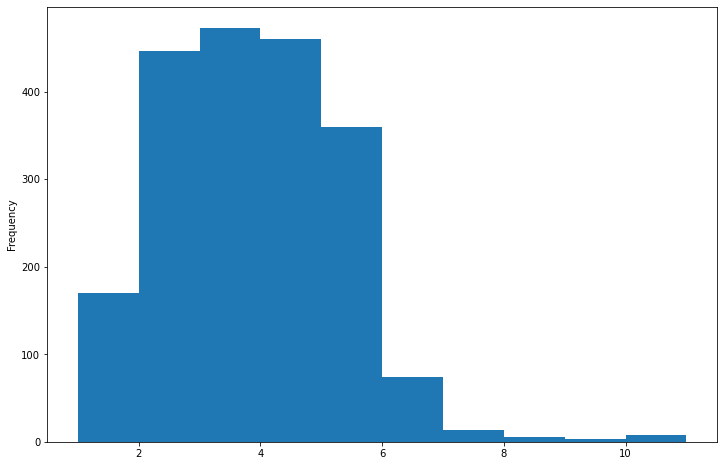

In [117]:
df['ActualWeekNum'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

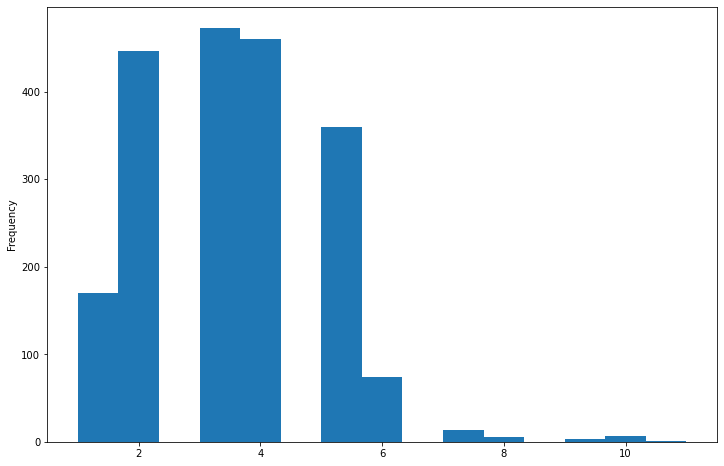

In [132]:
df['ActualWeekNum'].plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

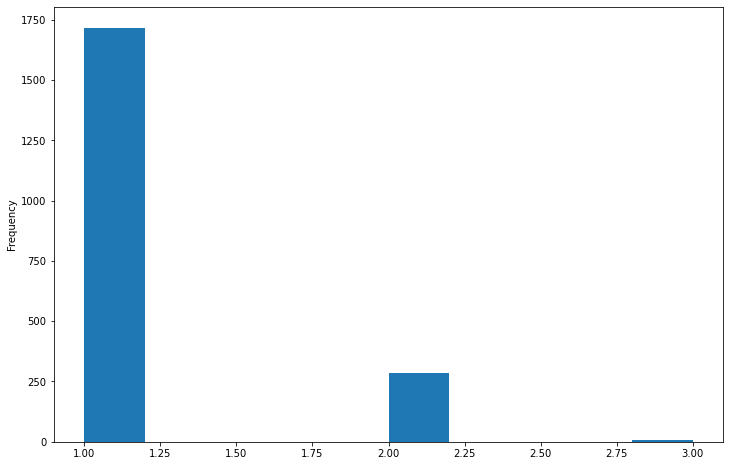

In [120]:
df['DaysClassNum'].plot.hist()

In [162]:
len(df['ManufacturerName'].unique())

51

In [163]:
len(df['CustomerName'].unique())

142

In [164]:
print(df['ManufacturerName'].unique())

['Holm Lighting' 'Hubbell Lighting' '3G Lighting' 'Barron Lighting Group'
 'Columbia' 'Compass Life Safety' 'ConTech Lighting' 'Dual-Lite'
 'Exitronix' 'Finelite' 'Hubbell Control Solutions'
 'Hubbell Industrial Lighting' 'None' 'Prescolite'
 'Architectural Area Lighting' 'Hubbell Outdoor Lighting'
 'Kenall Lighting' 'LiteControl' 'Lumos Custom' 'Progress Lighting'
 'Beulux' 'Kim Lighting' 'LuxDynamics' 'Tempo Industries' 'Trace-Lite'
 'Valmont' 'Wattstopper-EWS' 'Bega Lighting' 'Leotek Electronics USA LLC'
 'Fluxwerx Illumination Inc.' 'Primus Lighting' 'W. J. Whatley' 'Lumetta'
 'RP Lighting' 'Delta Light USA' 'Lexington Standards' 'Beacon Products'
 'Assurance Emergency Lighting' 'Pinnacle Lighting' 'Oxygen Lighting'
 'TMS Lighting' 'Alphabet Lighting, A Ledrabrands Company' 'Inter-Lux'
 'MixMatch Lighting' 'ARON Lighting, LLC' 'Delray Lighting'
 'Insight Lighting' 'Lighting Services, Inc.' 'KLIK USA' 'Lightnet USA'
 'Watt Stopper']


In [166]:
df_mfg_HOLM = df[df['ManufacturerName'].isin(['Holm Lighting'])]
df_mfg_HUBBELL = df[df['ManufacturerName'].isin(['Hubbell Lighting'])]
df_mfg_3GLTG = df[df['ManufacturerName'].isin(['3g Lighting'])]
df_mfg_BARRON = df[df['ManufacturerName'].isin(['Barron Lighting Group'])]
df_mfg_COL = df[df['ManufacturerName'].isin(['Columbia'])]
df_mfg_COM = df[df['ManufacturerName'].isin(['Compass Life Safety'])]
df_mfg_CONTECH = df[df['ManufacturerName'].isin(['ConTech Lighting'])]
df_mfg_DLE = df[df['ManufacturerName'].isin(['Dual-Lite'])]
df_mfg_EXI = df[df['ManufacturerName'].isin(['Exitronix'])]
df_mfg_FINELITE = df[df['ManufacturerName'].isin(['Finelite'])]
df_mfg_HUBBELLCONTROLSOLUTIONS = df[df['ManufacturerName'].isin(['Hubbell Control Solutions'])]
df_mfg_HUBBELLINDUSTRIALLIGHTING = df[df['ManufacturerName'].isin(['Hubbell Industrial Lighting'])]
df_mfg_NONE_RESELL = df[df['ManufacturerName'].isin(['None'])]
df_mfg_PRES = df[df['ManufacturerName'].isin(['Prescolite'])]
df_mfg_AAL = df[df['ManufacturerName'].isin(['Architectural Area Lighting'])]
df_mfg_HUBBELLOUTDOORLIGHTING = df[df['ManufacturerName'].isin(['Hubbell Outdoor Lighting'])]
df_mfg_KENALL = df[df['ManufacturerName'].isin(['Kenall Lighting'])]
df_mfg_LITECONTROL = df[df['ManufacturerName'].isin(['LiteControl'])]
df_mfg_LUMOS = df[df['ManufacturerName'].isin(['Lumos Custom'])]
df_mfg_PROGRESS = df[df['ManufacturerName'].isin(['Progress Lighting'])]
df_mfg_BEUL = df[df['ManufacturerName'].isin(['Beulux'])]
df_mfg_KIM = df[df['ManufacturerName'].isin(['Kim Lighting'])]


In [167]:
print(df['ManufacturerName'].unique())

['Holm Lighting' 'Hubbell Lighting' '3G Lighting' 'Barron Lighting Group'
 'Columbia' 'Compass Life Safety' 'ConTech Lighting' 'Dual-Lite'
 'Exitronix' 'Finelite' 'Hubbell Control Solutions'
 'Hubbell Industrial Lighting' 'None' 'Prescolite'
 'Architectural Area Lighting' 'Hubbell Outdoor Lighting'
 'Kenall Lighting' 'LiteControl' 'Lumos Custom' 'Progress Lighting'
 'Beulux' 'Kim Lighting' 'LuxDynamics' 'Tempo Industries' 'Trace-Lite'
 'Valmont' 'Wattstopper-EWS' 'Bega Lighting' 'Leotek Electronics USA LLC'
 'Fluxwerx Illumination Inc.' 'Primus Lighting' 'W. J. Whatley' 'Lumetta'
 'RP Lighting' 'Delta Light USA' 'Lexington Standards' 'Beacon Products'
 'Assurance Emergency Lighting' 'Pinnacle Lighting' 'Oxygen Lighting'
 'TMS Lighting' 'Alphabet Lighting, A Ledrabrands Company' 'Inter-Lux'
 'MixMatch Lighting' 'ARON Lighting, LLC' 'Delray Lighting'
 'Insight Lighting' 'Lighting Services, Inc.' 'KLIK USA' 'Lightnet USA'
 'Watt Stopper']


In [169]:
df_mfg_LUX = df[df['ManufacturerName'].isin(['LuxDynamics'])]
df_mfg_TEMPO = df[df['ManufacturerName'].isin(['Tempo Industries'])]
df_mfg_TRACELITE = df[df['ManufacturerName'].isin(['Trace-Lite'])]
df_mfg_VAL = df[df['ManufacturerName'].isin(['Valmont'])]
df_mfg_WATT = df[df['ManufacturerName'].isin(['Wattstopper-EWS'])]
df_mfg_BEGA = df[df['ManufacturerName'].isin(['Bega Lighting'])]
df_mfg_LEOTEK = df[df['ManufacturerName'].isin(['Leotek Electronics USA LLC'])]
df_mfg_FLUX = df[df['ManufacturerName'].isin(['Fluxwerx Illumination Inc.'])]
df_mfg_PRIMUS = df[df['ManufacturerName'].isin(['Primus Lighting'])]
df_mfg_WHATLEY = df[df['ManufacturerName'].isin(['W. J. Whatley'])]
df_mfg_LUMETTA = df[df['ManufacturerName'].isin(['Lumetta'])]
df_mfg_RPLIGHTING = df[df['ManufacturerName'].isin(['RP Lighting'])]
df_mfg_DELTA = df[df['ManufacturerName'].isin(['Delta Light USA'])]
df_mfg_LEX = df[df['ManufacturerName'].isin(['Lexington Standards'])]
df_mfg_BEACON = df[df['ManufacturerName'].isin(['Beacon Products'])]
df_mfg_ASSURANCE = df[df['ManufacturerName'].isin(['Assurance Emergency Lighting'])]
df_mfg_PINNACLE = df[df['ManufacturerName'].isin(['Pinnacle Lighting'])]
df_mfg_OXYGEN = df[df['ManufacturerName'].isin(['Oxygen Lighting'])]
df_mfg_TMS = df[df['ManufacturerName'].isin(['TMS Lighting'])]


In [170]:
print(df['ManufacturerName'].unique())

['Holm Lighting' 'Hubbell Lighting' '3G Lighting' 'Barron Lighting Group'
 'Columbia' 'Compass Life Safety' 'ConTech Lighting' 'Dual-Lite'
 'Exitronix' 'Finelite' 'Hubbell Control Solutions'
 'Hubbell Industrial Lighting' 'None' 'Prescolite'
 'Architectural Area Lighting' 'Hubbell Outdoor Lighting'
 'Kenall Lighting' 'LiteControl' 'Lumos Custom' 'Progress Lighting'
 'Beulux' 'Kim Lighting' 'LuxDynamics' 'Tempo Industries' 'Trace-Lite'
 'Valmont' 'Wattstopper-EWS' 'Bega Lighting' 'Leotek Electronics USA LLC'
 'Fluxwerx Illumination Inc.' 'Primus Lighting' 'W. J. Whatley' 'Lumetta'
 'RP Lighting' 'Delta Light USA' 'Lexington Standards' 'Beacon Products'
 'Assurance Emergency Lighting' 'Pinnacle Lighting' 'Oxygen Lighting'
 'TMS Lighting' 'Alphabet Lighting, A Ledrabrands Company' 'Inter-Lux'
 'MixMatch Lighting' 'ARON Lighting, LLC' 'Delray Lighting'
 'Insight Lighting' 'Lighting Services, Inc.' 'KLIK USA' 'Lightnet USA'
 'Watt Stopper']


In [172]:
df_mfg_ALPHABET = df[df['ManufacturerName'].isin(['Alphabet Lighting, A Ledrabrands Company'])]
df_mfg_INTERLUX = df[df['ManufacturerName'].isin(['Inter-Lux'])]
df_mfg_MIXMATCH = df[df['ManufacturerName'].isin(['Mixmatch Lighting'])]
df_mfg_ARON = df[df['ManufacturerName'].isin(['ARON Lighting, LLC'])]
df_mfg_DELRAY = df[df['ManufacturerName'].isin(['Delray Lighting'])]
df_mfg_INSIGHT = df[df['ManufacturerName'].isin(['Insight Lighting'])]
df_mfg_LIGHTINGSERVICES = df[df['ManufacturerName'].isin(['Lighting Services, Inc.'])]
df_mfg_KLIK = df[df['ManufacturerName'].isin(['KLIK USA'])]
df_mfg_LIGHTNET = df[df['ManufacturerName'].isin(['Lightnet USA'])]
df_mfg_WATTSTOPPER = df[df['ManufacturerName'].isin(['Watt Stopper'])]

In [174]:
y_pred_weekly_INTERLUX = df_mfg_LUX[['PATweekNum']]
y_true_weekly_INTERLUX = df_mfg_LUX[['ActualWeekNum']]
y_pred_weekly_LIGHTNET = df_mfg_LIGHTNET[['PATweekNum']]
y_true_weekly_LIGHTNET = df_mfg_LIGHTNET[['ActualWeekNum']]
y_pred_weekly_MIXMATCH = df_mfg_MIXMATCH[['PATweekNum']]
y_true_weekly_MIXMATCH = df_mfg_MIXMATCH[['ActualWeekNum']]
y_pred_weekly_DELRAY = df_mfg_DELRAY[['PATweekNum']]
y_true_weekly_DELRAY = df_mfg_DELRAY[['ActualWeekNum']]
y_pred_weekly_LIGHTINGSERVICES = df_mfg_LIGHTINGSERVICES[['PATweekNum']]
y_true_weekly_LIGHTINGSERVICES = df_mfg_LIGHTINGSERVICES[['ActualWeekNum']]
y_pred_weekly_ARON = df_mfg_ARON[['PATweekNum']]
y_true_weekly_ARON = df_mfg_ARON[['ActualWeekNum']]
y_pred_weekly_ALPHABET = df_mfg_ALPHABET[['PATweekNum']]
y_true_weekly_ALPHABET = df_mfg_ALPHABET[['ActualWeekNum']]
y_pred_weekly_LUMOS = df_mfg_LUMOS[['PATweekNum']]
y_true_weekly_LUMOS = df_mfg_LUMOS[['ActualWeekNum']]
y_pred_weekly_KLIK = df_mfg_KLIK[['PATweekNum']]
y_true_weekly_KLIK = df_mfg_KLIK[['ActualWeekNum']]

In [186]:
y_pred_weekly_COM = df_mfg_COM[['PATweekNum']]
y_true_weekly_COM = df_mfg_COM[['ActualWeekNum']]
y_pred_weekly_FINELITE = df_mfg_FINELITE[['PATweekNum']]
y_true_weekly_FINELITE = df_mfg_FINELITE[['ActualWeekNum']]
y_pred_weekly_TRACELITE = df_mfg_TRACELITE[['PATweekNum']]
y_true_weekly_TRACELITE = df_mfg_TRACELITE[['ActualWeekNum']]
y_pred_weekly_LEX = df_mfg_LEX[['PATweekNum']]
y_true_weekly_LEX = df_mfg_LEX[['ActualWeekNum']]
y_pred_weekly_HOLM = df_mfg_HOLM[['PATweekNum']]
y_true_weekly_HOLM = df_mfg_HOLM[['ActualWeekNum']]
y_pred_weekly_DELTA = df_mfg_DELTA[['PATweekNum']]
y_true_weekly_DELTA = df_mfg_DELTA[['ActualWeekNum']]
y_pred_weekly_AAL = df_mfg_AAL[['PATweekNum']]
y_true_weekly_AAL = df_mfg_AAL[['ActualWeekNum']]
y_pred_weekly_BARRON = df_mfg_BARRON[['PATweekNum']]
y_true_weekly_BARRON = df_mfg_BARRON[['ActualWeekNum']]
y_pred_weekly_ASSURANCE = df_mfg_ASSURANCE[['PATweekNum']]
y_true_weekly_ASSURANCE = df_mfg_ASSURANCE[['ActualWeekNum']]
y_pred_weekly_LUMOS = df_mfg_LUMOS[['PATweekNum']]
y_true_weekly_LUMOS = df_mfg_LUMOS[['ActualWeekNum']]
y_pred_weekly_TEMPO = df_mfg_TEMPO[['PATweekNum']]
y_true_weekly_TEMPO = df_mfg_TEMPO[['ActualWeekNum']]
y_pred_weekly_RPLIGHTING = df_mfg_RPLIGHTING[['PATweekNum']]
y_true_weekly_RPLIGHTING = df_mfg_RPLIGHTING[['ActualWeekNum']]
y_pred_weekly_CONTECH = df_mfg_CONTECH[['PATweekNum']]
y_true_weekly_CONTECH = df_mfg_CONTECH[['ActualWeekNum']]
y_pred_weekly_WHATLEY = df_mfg_WHATLEY[['PATweekNum']]
y_true_weekly_WHATLEY = df_mfg_WHATLEY[['ActualWeekNum']]
y_pred_weekly_PROGRESS = df_mfg_PROGRESS[['PATweekNum']]
y_true_weekly_PROGRESS = df_mfg_PROGRESS[['ActualWeekNum']]
y_pred_weekly_BEGA = df_mfg_BEGA[['PATweekNum']]
y_true_weekly_BEGA = df_mfg_BEGA[['ActualWeekNum']]
y_pred_weekly_DLE = df_mfg_DLE[['PATweekNum']]
y_true_weekly_DLE = df_mfg_DLE[['ActualWeekNum']]
y_pred_weekly_KIM = df_mfg_KIM[['PATweekNum']]
y_true_weekly_KIM = df_mfg_KIM[['ActualWeekNum']]
y_pred_weekly_BEACON = df_mfg_BEACON[['PATweekNum']]
y_true_weekly_BEACON = df_mfg_BEACON[['ActualWeekNum']]
y_pred_weekly_TMS = df_mfg_TMS[['PATweekNum']]
y_true_weekly_TMS = df_mfg_TMS[['ActualWeekNum']]
y_pred_weekly_HUBBELL = df_mfg_HUBBELL[['PATweekNum']]
y_true_weekly_HUBBELL = df_mfg_HUBBELL[['ActualWeekNum']]
y_pred_weekly_COL = df_mfg_COL[['PATweekNum']]
y_true_weekly_COL = df_mfg_COL[['ActualWeekNum']]
y_pred_weekly_PRES = df_mfg_PRES[['PATweekNum']]
y_true_weekly_PRES = df_mfg_PRES[['ActualWeekNum']]
y_pred_weekly_3GLTG = df_mfg_3GLTG[['PATweekNum']]
y_true_weekly_3GLTG = df_mfg_3GLTG[['ActualWeekNum']]
y_pred_weekly_KENALL = df_mfg_KENALL[['PATweekNum']]
y_true_weekly_KENALL = df_mfg_KENALL[['ActualWeekNum']]
y_pred_weekly_PRIMUS = df_mfg_PRIMUS[['PATweekNum']]
y_true_weekly_PRIMUS = df_mfg_PRIMUS[['ActualWeekNum']]
y_pred_weekly_EXI = df_mfg_EXI[['PATweekNum']]
y_true_weekly_EXI = df_mfg_EXI[['ActualWeekNum']]
y_pred_weekly_VAL = df_mfg_VAL[['PATweekNum']]
y_true_weekly_VAL = df_mfg_VAL[['ActualWeekNum']]
y_pred_weekly_NONE_RESELL = df_mfg_NONE_RESELL[['PATweekNum']]
y_true_weekly_NONE_RESELL = df_mfg_NONE_RESELL[['ActualWeekNum']]
y_pred_weekly_INSIGHT = df_mfg_INSIGHT[['PATweekNum']]
y_true_weekly_INSIGHT = df_mfg_INSIGHT[['ActualWeekNum']]
y_pred_weekly_OXYGEN = df_mfg_OXYGEN[['PATweekNum']]
y_true_weekly_OXYGEN = df_mfg_OXYGEN[['ActualWeekNum']]
y_pred_weekly_WATT = df_mfg_WATT[['PATweekNum']]
y_true_weekly_WATT = df_mfg_WATT[['ActualWeekNum']]
y_pred_weekly_PINNACLE = df_mfg_PINNACLE[['PATweekNum']]
y_true_weekly_PINNACLE = df_mfg_PINNACLE[['ActualWeekNum']]
y_pred_weekly_DELTA = df_mfg_DELTA[['PATweekNum']]
y_true_weekly_DELTA = df_mfg_DELTA[['ActualWeekNum']]
y_pred_weekly_LUMETTA = df_mfg_LUMETTA[['PATweekNum']]
y_true_weekly_LUMETTA = df_mfg_LUMETTA[['ActualWeekNum']]
y_pred_weekly_FLUX = df_mfg_FLUX[['PATweekNum']]
y_true_weekly_FLUX = df_mfg_FLUX[['ActualWeekNum']]
y_pred_weekly_LEOTEK = df_mfg_LEOTEK[['PATweekNum']]
y_true_weekly_LEOTEK = df_mfg_LEOTEK[['ActualWeekNum']]
y_pred_weekly_LUX = df_mfg_LUX[['PATweekNum']]
y_true_weekly_LUX = df_mfg_LUX[['ActualWeekNum']]
y_pred_weekly_WATTSTOPPER = df_mfg_WATTSTOPPER[['PATweekNum']]
y_true_weekly_WATTSTOPPER = df_mfg_WATTSTOPPER[['ActualWeekNum']]
y_pred_weekly_BEUL = df_mfg_BEUL[['PATweekNum']]
y_true_weekly_BEUL = df_mfg_BEUL[['ActualWeekNum']]
y_pred_weekly_HUBBELLINDUSTRIALLIGHTING = df_mfg_HUBBELLINDUSTRIALLIGHTING[['PATweekNum']]
y_true_weekly_HUBBELLINDUSTRIALLIGHTING = df_mfg_HUBBELLINDUSTRIALLIGHTING[['ActualWeekNum']]
y_pred_weekly_HUBBELLOUTDOORLIGHTING = df_mfg_HUBBELLOUTDOORLIGHTING[['PATweekNum']]
y_true_weekly_HUBBELLOUTDOORLIGHTING = df_mfg_HUBBELLOUTDOORLIGHTING[['ActualWeekNum']]
y_pred_weekly_HUBBELLCONTROLSOLUTIONS = df_mfg_HUBBELLCONTROLSOLUTIONS[['PATweekNum']]
y_true_weekly_HUBBELLCONTROLSOLUTIONS = df_mfg_HUBBELLCONTROLSOLUTIONS[['ActualWeekNum']]
y_pred_weekly_LITECONTROL = df_mfg_LITECONTROL[['PATweekNum']]
y_true_weekly_LITECONTROL = df_mfg_LITECONTROL[['ActualWeekNum']]

In [187]:
y_pred_monthly_INTERLUX = df_mfg_LUX[['PATclassNum']]
y_true_monthly_INTERLUX = df_mfg_LUX[['DaysClassNum']]
y_pred_monthly_LIGHTNET = df_mfg_LIGHTNET[['PATclassNum']]
y_true_monthly_LIGHTNET = df_mfg_LIGHTNET[['DaysClassNum']]
y_pred_monthly_MIXMATCH = df_mfg_MIXMATCH[['PATclassNum']]
y_true_monthly_MIXMATCH = df_mfg_MIXMATCH[['DaysClassNum']]
y_pred_monthly_DELRAY = df_mfg_DELRAY[['PATclassNum']]
y_true_monthly_DELRAY = df_mfg_DELRAY[['DaysClassNum']]
y_pred_monthly_LIGHTINGSERVICES = df_mfg_LIGHTINGSERVICES[['PATclassNum']]
y_true_monthly_LIGHTINGSERVICES = df_mfg_LIGHTINGSERVICES[['DaysClassNum']]
y_pred_monthly_ARON = df_mfg_ARON[['PATclassNum']]
y_true_monthly_ARON = df_mfg_ARON[['DaysClassNum']]
y_pred_monthly_ALPHABET = df_mfg_ALPHABET[['PATclassNum']]
y_true_monthly_ALPHABET = df_mfg_ALPHABET[['DaysClassNum']]
y_pred_monthly_LUMOS = df_mfg_LUMOS[['PATclassNum']]
y_true_monthly_LUMOS = df_mfg_LUMOS[['DaysClassNum']]
y_pred_monthly_KLIK = df_mfg_KLIK[['PATclassNum']]
y_true_monthly_KLIK = df_mfg_KLIK[['DaysClassNum']]
y_pred_monthly_COM = df_mfg_COM[['PATclassNum']]
y_true_monthly_COM = df_mfg_COM[['DaysClassNum']]
y_pred_monthly_FINELITE = df_mfg_FINELITE[['PATclassNum']]
y_true_monthly_FINELITE = df_mfg_FINELITE[['DaysClassNum']]
y_pred_monthly_TRACELITE = df_mfg_TRACELITE[['PATclassNum']]
y_true_monthly_TRACELITE = df_mfg_TRACELITE[['DaysClassNum']]
y_pred_monthly_LEX = df_mfg_LEX[['PATclassNum']]
y_true_monthly_LEX = df_mfg_LEX[['DaysClassNum']]
y_pred_monthly_HOLM = df_mfg_HOLM[['PATclassNum']]
y_true_monthly_HOLM = df_mfg_HOLM[['DaysClassNum']]
y_pred_monthly_DELTA = df_mfg_DELTA[['PATclassNum']]
y_true_monthly_DELTA = df_mfg_DELTA[['DaysClassNum']]
y_pred_monthly_AAL = df_mfg_AAL[['PATclassNum']]
y_true_monthly_AAL = df_mfg_AAL[['DaysClassNum']]
y_pred_monthly_BARRON = df_mfg_BARRON[['PATclassNum']]
y_true_monthly_BARRON = df_mfg_BARRON[['DaysClassNum']]
y_pred_monthly_ASSURANCE = df_mfg_ASSURANCE[['PATclassNum']]
y_true_monthly_ASSURANCE = df_mfg_ASSURANCE[['DaysClassNum']]
y_pred_monthly_LUMOS = df_mfg_LUMOS[['PATclassNum']]
y_true_monthly_LUMOS = df_mfg_LUMOS[['DaysClassNum']]
y_pred_monthly_TEMPO = df_mfg_TEMPO[['PATclassNum']]
y_true_monthly_TEMPO = df_mfg_TEMPO[['DaysClassNum']]
y_pred_monthly_RPLIGHTING = df_mfg_RPLIGHTING[['PATclassNum']]
y_true_monthly_RPLIGHTING = df_mfg_RPLIGHTING[['DaysClassNum']]
y_pred_monthly_CONTECH = df_mfg_CONTECH[['PATclassNum']]
y_true_monthly_CONTECH = df_mfg_CONTECH[['DaysClassNum']]
y_pred_monthly_WHATLEY = df_mfg_WHATLEY[['PATclassNum']]
y_true_monthly_WHATLEY = df_mfg_WHATLEY[['DaysClassNum']]
y_pred_monthly_PROGRESS = df_mfg_PROGRESS[['PATclassNum']]
y_true_monthly_PROGRESS = df_mfg_PROGRESS[['DaysClassNum']]
y_pred_monthly_BEGA = df_mfg_BEGA[['PATclassNum']]
y_true_monthly_BEGA = df_mfg_BEGA[['DaysClassNum']]
y_pred_monthly_DLE = df_mfg_DLE[['PATclassNum']]
y_true_monthly_DLE = df_mfg_DLE[['DaysClassNum']]
y_pred_monthly_KIM = df_mfg_KIM[['PATclassNum']]
y_true_monthly_KIM = df_mfg_KIM[['DaysClassNum']]
y_pred_monthly_BEACON = df_mfg_BEACON[['PATclassNum']]
y_true_monthly_BEACON = df_mfg_BEACON[['DaysClassNum']]
y_pred_monthly_TMS = df_mfg_TMS[['PATclassNum']]
y_true_monthly_TMS = df_mfg_TMS[['DaysClassNum']]
y_pred_monthly_HUBBELL = df_mfg_HUBBELL[['PATclassNum']]
y_true_monthly_HUBBELL = df_mfg_HUBBELL[['DaysClassNum']]
y_pred_monthly_COL = df_mfg_COL[['PATclassNum']]
y_true_monthly_COL = df_mfg_COL[['DaysClassNum']]
y_pred_monthly_PRES = df_mfg_PRES[['PATclassNum']]
y_true_monthly_PRES = df_mfg_PRES[['DaysClassNum']]
y_pred_monthly_3GLTG = df_mfg_3GLTG[['PATclassNum']]
y_true_monthly_3GLTG = df_mfg_3GLTG[['DaysClassNum']]
y_pred_monthly_KENALL = df_mfg_KENALL[['PATclassNum']]
y_true_monthly_KENALL = df_mfg_KENALL[['DaysClassNum']]
y_pred_monthly_PRIMUS = df_mfg_PRIMUS[['PATclassNum']]
y_true_monthly_PRIMUS = df_mfg_PRIMUS[['DaysClassNum']]
y_pred_monthly_EXI = df_mfg_EXI[['PATclassNum']]
y_true_monthly_EXI = df_mfg_EXI[['DaysClassNum']]
y_pred_monthly_VAL = df_mfg_VAL[['PATclassNum']]
y_true_monthly_VAL = df_mfg_VAL[['DaysClassNum']]
y_pred_monthly_NONE_RESELL = df_mfg_NONE_RESELL[['PATclassNum']]
y_true_monthly_NONE_RESELL = df_mfg_NONE_RESELL[['DaysClassNum']]
y_pred_monthly_INSIGHT = df_mfg_INSIGHT[['PATclassNum']]
y_true_monthly_INSIGHT = df_mfg_INSIGHT[['DaysClassNum']]
y_pred_monthly_OXYGEN = df_mfg_OXYGEN[['PATclassNum']]
y_true_monthly_OXYGEN = df_mfg_OXYGEN[['DaysClassNum']]
y_pred_monthly_WATT = df_mfg_WATT[['PATclassNum']]
y_true_monthly_WATT = df_mfg_WATT[['DaysClassNum']]
y_pred_monthly_PINNACLE = df_mfg_PINNACLE[['PATclassNum']]
y_true_monthly_PINNACLE = df_mfg_PINNACLE[['DaysClassNum']]
y_pred_monthly_DELTA = df_mfg_DELTA[['PATclassNum']]
y_true_monthly_DELTA = df_mfg_DELTA[['DaysClassNum']]
y_pred_monthly_LUMETTA = df_mfg_LUMETTA[['PATclassNum']]
y_true_monthly_LUMETTA = df_mfg_LUMETTA[['DaysClassNum']]
y_pred_monthly_FLUX = df_mfg_FLUX[['PATclassNum']]
y_true_monthly_FLUX = df_mfg_FLUX[['DaysClassNum']]
y_pred_monthly_LEOTEK = df_mfg_LEOTEK[['PATclassNum']]
y_true_monthly_LEOTEK = df_mfg_LEOTEK[['DaysClassNum']]
y_pred_monthly_LUX = df_mfg_LUX[['PATclassNum']]
y_true_monthly_LUX = df_mfg_LUX[['DaysClassNum']]
y_pred_monthly_WATTSTOPPER = df_mfg_WATTSTOPPER[['PATclassNum']]
y_true_monthly_WATTSTOPPER = df_mfg_WATTSTOPPER[['DaysClassNum']]
y_pred_monthly_BEUL = df_mfg_BEUL[['PATclassNum']]
y_true_monthly_BEUL = df_mfg_BEUL[['DaysClassNum']]
y_pred_monthly_HUBBELLINDUSTRIALLIGHTING = df_mfg_HUBBELLINDUSTRIALLIGHTING[['PATclassNum']]
y_true_monthly_HUBBELLINDUSTRIALLIGHTING = df_mfg_HUBBELLINDUSTRIALLIGHTING[['DaysClassNum']]
y_pred_monthly_HUBBELLOUTDOORLIGHTING = df_mfg_HUBBELLOUTDOORLIGHTING[['PATclassNum']]
y_true_monthly_HUBBELLOUTDOORLIGHTING = df_mfg_HUBBELLOUTDOORLIGHTING[['DaysClassNum']]
y_pred_monthly_HUBBELLCONTROLSOLUTIONS = df_mfg_HUBBELLCONTROLSOLUTIONS[['PATclassNum']]
y_true_monthly_HUBBELLCONTROLSOLUTIONS = df_mfg_HUBBELLCONTROLSOLUTIONS[['DaysClassNum']]
y_pred_monthly_LITECONTROL = df_mfg_LITECONTROL[['PATclassNum']]
y_true_monthly_LITECONTROL = df_mfg_LITECONTROL[['DaysClassNum']]

Individual Manufacturer Accuracy Analysis

INTERLUX

In [188]:
balanced_accuracy_score(y_pred_monthly_INTERLUX, y_true_monthly_INTERLUX)

0.75

In [248]:
print(classification_report(y_pred_monthly_INTERLUX, y_true_monthly_INTERLUX, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.75      0.75      0.75         4
   macro avg       0.25      0.19      0.21         4
weighted avg       1.00      0.75      0.86         4



In [346]:
balanced_accuracy_score(y_pred_weekly_INTERLUX, y_true_weekly_INTERLUX)

0.3333333333333333

In [348]:
print(classification_report(y_pred_weekly_INTERLUX, y_true_weekly_INTERLUX, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.25      0.25      0.25         4
   macro avg       0.08      0.08      0.08         4
weighted avg       0.25      0.25      0.25         4



LIGHTNET

In [192]:
balanced_accuracy_score(y_true_monthly_LIGHTNET, y_pred_monthly_LIGHTNET)

1.0

In [251]:
print(classification_report(y_pred_monthly_LIGHTNET, y_true_monthly_LIGHTNET, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         1
   macro avg       0.25      0.25      0.25         1
weighted avg       1.00      1.00      1.00         1



In [349]:
balanced_accuracy_score(y_true_weekly_LIGHTNET, y_pred_weekly_LIGHTNET)

0.0

In [350]:
print(classification_report(y_pred_weekly_LIGHTNET, y_true_weekly_LIGHTNET, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [351]:
#balanced_accuracy_score(y_pred_monthly_MIXMATCH, y_true_monthly_MIXMATCH)
#this one errored???

DELRAY

In [352]:
balanced_accuracy_score(y_true_monthly_DELRAY, y_pred_monthly_DELRAY)

0.0

In [353]:
print(classification_report(y_pred_monthly_DELRAY, y_true_monthly_DELRAY, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [354]:
balanced_accuracy_score(y_true_weekly_DELRAY, y_pred_weekly_DELRAY)

0.0

In [355]:
print(classification_report(y_pred_weekly_, y_true_weekly_, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

NameError: name 'y_pred_weekly_' is not defined

LIGHTING SERVICES

In [356]:
balanced_accuracy_score(y_pred_monthly_LIGHTINGSERVICES, y_true_monthly_LIGHTINGSERVICES)

1.0

In [357]:
print(classification_report(y_pred_monthly_LIGHTINGSERVICES, y_true_monthly_LIGHTINGSERVICES, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         1
   macro avg       0.25      0.25      0.25         1
weighted avg       1.00      1.00      1.00         1



In [358]:
balanced_accuracy_score(y_pred_weekly_LIGHTINGSERVICES, y_true_weekly_LIGHTINGSERVICES)

1.0

In [359]:
print(classification_report(y_pred_weekly_, y_true_weekly_, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

NameError: name 'y_pred_weekly_' is not defined

ARON

In [360]:
balanced_accuracy_score(y_true_monthly_ARON, y_pred_monthly_ARON)

0.0

In [361]:
print(classification_report(y_pred_monthly_ARON, y_true_monthly_ARON, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [362]:
balanced_accuracy_score(y_true_weekly_ARON, y_pred_weekly_ARON)

0.0

In [363]:
print(classification_report(y_pred_weekly_ARON, y_true_weekly_ARON, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       2.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



ALPHABET

In [364]:
balanced_accuracy_score(y_true_monthly_ALPHABET, y_pred_monthly_ALPHABET)

1.0

In [365]:
print(classification_report(y_pred_monthly_ALPHABET, y_true_monthly_ALPHABET, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         2
   macro avg       0.25      0.25      0.25         2
weighted avg       1.00      1.00      1.00         2



In [366]:
balanced_accuracy_score(y_true_weekly_ALPHABET, y_pred_weekly_ALPHABET)

1.0

In [367]:
print(classification_report(y_pred_weekly_ALPHABET, y_true_weekly_ALPHABET, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         2
   macro avg       0.08      0.08      0.08         2
weighted avg       1.00      1.00      1.00         2



LUMOS

In [368]:
balanced_accuracy_score(y_true_monthly_LUMOS, y_pred_monthly_LUMOS)

0.0

In [369]:
print(classification_report(y_pred_monthly_LUMOS, y_true_monthly_LUMOS, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [370]:
balanced_accuracy_score(y_true_weekly_LUMOS, y_pred_weekly_LUMOS)

0.0

In [371]:
print(classification_report(y_pred_weekly_LUMOS, y_true_weekly_LUMOS, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



KLIK

In [372]:
balanced_accuracy_score(y_true_monthly_KLIK,
y_pred_monthly_KLIK)

1.0

In [373]:
print(classification_report(y_pred_monthly_KLIK, y_true_monthly_KLIK, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         2
   macro avg       0.25      0.25      0.25         2
weighted avg       1.00      1.00      1.00         2



In [374]:
balanced_accuracy_score(y_true_weekly_KLIK,
y_pred_weekly_KLIK)

1.0

In [375]:
print(classification_report(y_pred_weekly_KLIK, y_true_weekly_KLIK, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         2
   macro avg       0.08      0.08      0.08         2
weighted avg       1.00      1.00      1.00         2



COM

In [376]:
balanced_accuracy_score(y_true_monthly_COM,
y_pred_monthly_COM)

0.5

In [377]:
print(classification_report(y_pred_monthly_COM, y_true_monthly_COM, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        39
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.95      0.95      0.95        39
   macro avg       0.25      0.24      0.24        39
weighted avg       1.00      0.95      0.97        39



In [378]:
balanced_accuracy_score(y_true_weekly_COM,
y_pred_weekly_COM)

0.19886363636363635

In [379]:
print(classification_report(y_pred_weekly_COM, y_true_weekly_COM, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.55      0.38      0.44        16
           3       0.25      0.43      0.32         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.23      0.23      0.23        39
   macro avg       0.06      0.06      0.06        39
weighted avg       0.27      0.23      0.24        39



FINELITE

In [380]:
balanced_accuracy_score(y_true_monthly_FINELITE,
y_pred_monthly_FINELITE)

0.6071428571428572

In [381]:
print(classification_report(y_pred_monthly_FINELITE, y_true_monthly_FINELITE, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         1
           3       0.71      0.83      0.77         6
           4       0.00      0.00      0.00         0

   micro avg       0.67      0.67      0.67         9
   macro avg       0.30      0.46      0.36         9
weighted avg       0.53      0.67      0.59         9



In [382]:
balanced_accuracy_score(y_true_weekly_FINELITE,
y_pred_weekly_FINELITE)

0.275

In [383]:
print(classification_report(y_pred_weekly_FINELITE, y_true_weekly_FINELITE, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         0
          10       0.60      0.60      0.60         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.44      0.44      0.44         9
   macro avg       0.08      0.12      0.10         9
weighted avg       0.39      0.44      0.41         9



TRACELITE

In [384]:
balanced_accuracy_score(y_true_monthly_TRACELITE,
y_pred_monthly_TRACELITE)

0.5

In [385]:
print(classification_report(y_pred_monthly_TRACELITE, y_true_monthly_TRACELITE, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         4
   macro avg       0.25      0.25      0.25         4
weighted avg       0.50      0.50      0.50         4



In [386]:
balanced_accuracy_score(y_true_weekly_TRACELITE,
y_pred_weekly_TRACELITE)

0.0

In [387]:
print(classification_report(y_pred_weekly_TRACELITE, y_true_weekly_TRACELITE, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       2.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       2.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



LEX

In [391]:
balanced_accuracy_score(y_true_monthly_LEX,
y_pred_monthly_LEX )

0.4861111111111111

In [392]:
print(classification_report(y_pred_monthly_LEX, y_true_monthly_LEX, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.75      0.30      0.43        10
           2       0.22      0.67      0.33         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.38      0.38      0.38        13
   macro avg       0.24      0.24      0.19        13
weighted avg       0.63      0.38      0.41        13



In [393]:
balanced_accuracy_score(y_true_weekly_LEX,
y_pred_weekly_LEX )

0.10416666666666666

In [394]:
print(classification_report(y_pred_weekly_LEX, y_true_weekly_LEX, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.25      1.00      0.40         1
           5       0.17      0.33      0.22         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.15      0.15      0.15        13
   macro avg       0.03      0.10      0.05        13
weighted avg       0.06      0.15      0.08        13



HOLM

In [395]:
balanced_accuracy_score(y_true_monthly_HOLM,
y_pred_monthly_HOLM)

0.0

In [396]:
print(classification_report(y_pred_monthly_HOLM, y_true_monthly_HOLM, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [397]:
balanced_accuracy_score(y_true_weekly_HOLM,
y_pred_weekly_HOLM)

0.0

In [398]:
print(classification_report(y_pred_weekly_HOLM, y_true_weekly_HOLM, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



DELTA

In [399]:
balanced_accuracy_score(y_true_monthly_DELTA,
y_pred_monthly_DELTA)

0.0

In [400]:
print(classification_report(y_pred_monthly_DELTA, y_true_monthly_DELTA, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [401]:
balanced_accuracy_score(y_true_weekly_DELTA,
y_pred_weekly_DELTA)

0.0

In [402]:
print(classification_report(y_pred_weekly_DELTA, y_true_weekly_DELTA, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



AAL

In [403]:
balanced_accuracy_score(y_true_monthly_AAL,
y_pred_monthly_AAL)

0.7405660377358491

In [404]:
print(classification_report(y_pred_monthly_AAL, y_true_monthly_AAL, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        53
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96        55
   macro avg       0.37      0.50      0.41        55
weighted avg       0.95      0.96      0.96        55



In [550]:
balanced_accuracy_score(y_true_weekly_AAL, y_pred_weekly_AAL)

0.29818181818181816

In [406]:
print(classification_report(y_pred_weekly_AAL, y_true_weekly_AAL, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.73      0.28      0.41        39
           2       0.09      0.25      0.13         4
           3       0.00      0.00      0.00         0
           4       0.33      0.50      0.40        10
           5       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.33      0.33      0.33        55
   macro avg       0.11      0.16      0.11        55
weighted avg       0.59      0.33      0.38        55



BARRON

In [407]:
balanced_accuracy_score(y_true_monthly_BARRON,
y_pred_monthly_BARRON)

0.5678571428571428

In [408]:
print(classification_report(y_pred_monthly_BARRON, y_true_monthly_BARRON, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.85      0.77      0.81        22
           2       0.29      0.40      0.33         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.70      0.70      0.70        27
   macro avg       0.28      0.29      0.29        27
weighted avg       0.75      0.70      0.72        27



In [551]:
balanced_accuracy_score(y_true_weekly_BARRON, y_pred_weekly_BARRON)

0.1851851851851852

In [ ]:
print(classification_report(y_pred_weekly_BARRON, y_true_weekly_BARRON, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

ASSURANCE

In [410]:
balanced_accuracy_score(y_true_monthly_ASSURANCE,
y_pred_monthly_ASSURANCE)

0.0

In [411]:
print(classification_report(y_pred_monthly_ASSURANCE, y_true_monthly_ASSURANCE, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       6.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



In [552]:
balanced_accuracy_score(y_true_weekly_ASSURANCE, y_pred_weekly_ASSURANCE)

0.0

In [ ]:
print(classification_report(y_pred_weekly_ASSURANCE, y_true_weekly_ASSURANCE, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

LUMOS

In [413]:
balanced_accuracy_score(y_true_monthly_LUMOS,
y_pred_monthly_LUMOS)

0.0

In [414]:
print(classification_report(y_pred_monthly_LUMOS, y_true_monthly_LUMOS, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [553]:
balanced_accuracy_score(y_true_weekly_LUMOS, y_pred_weekly_LUMOS)

0.0

In [416]:
print(classification_report(y_pred_weekly_LUMOS, y_true_weekly_LUMOS, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



TEMPO

In [417]:
balanced_accuracy_score(y_true_monthly_TEMPO,
y_pred_monthly_TEMPO)

0.3333333333333333

In [418]:
print(classification_report(y_pred_monthly_TEMPO, y_true_monthly_TEMPO, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.33      0.33      0.33         3
   macro avg       0.08      0.25      0.12         3
weighted avg       0.11      0.33      0.17         3



In [554]:
balanced_accuracy_score(y_true_weekly_TEMPO, y_pred_weekly_TEMPO)

0.0

In [420]:
print(classification_report(y_pred_weekly_TEMPO, y_true_weekly_TEMPO, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



RPLIGHTING

In [421]:
balanced_accuracy_score(y_true_monthly_RPLIGHTING,
y_pred_monthly_RPLIGHTING)

0.6785714285714286

In [422]:
print(classification_report(y_pred_monthly_RPLIGHTING, y_true_monthly_RPLIGHTING, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.86      0.55      0.67        11
           2       0.50      0.83      0.62         6
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.65      0.65      0.65        17
   macro avg       0.34      0.34      0.32        17
weighted avg       0.73      0.65      0.65        17



In [555]:
balanced_accuracy_score(y_true_weekly_RPLIGHTING, y_pred_weekly_RPLIGHTING)

0.21666666666666665

In [424]:
print(classification_report(y_pred_weekly_RPLIGHTING, y_true_weekly_RPLIGHTING, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.33      0.17      0.22         6
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.75      0.50      0.60         6
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.24      0.24      0.24        17
   macro avg       0.08      0.05      0.06        17
weighted avg       0.38      0.24      0.29        17



CONTECH

In [425]:
balanced_accuracy_score(y_true_monthly_CONTECH,
y_pred_monthly_CONTECH)

0.5677083333333333

In [426]:
print(classification_report(y_pred_monthly_CONTECH, y_true_monthly_CONTECH, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.54      0.67      0.60        39
           2       0.59      0.46      0.52        41
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.56      0.56      0.56        80
   macro avg       0.28      0.28      0.28        80
weighted avg       0.57      0.56      0.56        80



In [556]:
balanced_accuracy_score(y_true_weekly_CONTECH, y_pred_weekly_CONTECH)

0.15105263157894738

In [428]:
print(classification_report(y_pred_weekly_CONTECH, y_true_weekly_CONTECH, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         0
           3       0.11      0.40      0.17         5
           4       0.40      0.29      0.33        28
           5       0.25      0.17      0.20        36
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.20      0.20      0.20        80
   macro avg       0.06      0.07      0.05        80
weighted avg       0.26      0.20      0.22        80



WHATLEY

In [429]:
balanced_accuracy_score(y_true_monthly_WHATLEY,
y_pred_monthly_WHATLEY)

0.0

In [430]:
print(classification_report(y_pred_monthly_WHATLEY, y_true_monthly_WHATLEY, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [557]:
balanced_accuracy_score(y_true_weekly_WHATLEY, y_pred_weekly_WHATLEY)

0.0

In [432]:
print(classification_report(y_pred_weekly_WHATLEY, y_true_weekly_WHATLEY, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



PROGRESS

In [433]:
balanced_accuracy_score(y_true_monthly_PROGRESS,
y_pred_monthly_PROGRESS)

0.5098684210526316

In [434]:
print(classification_report(y_pred_monthly_PROGRESS, y_true_monthly_PROGRESS, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.89      0.71      0.79        24
           2       0.12      0.33      0.18         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.67      0.67      0.67        27
   macro avg       0.25      0.26      0.24        27
weighted avg       0.81      0.67      0.72        27



In [558]:
balanced_accuracy_score(y_true_weekly_PROGRESS, y_pred_weekly_PROGRESS)

0.2733333333333333

In [436]:
print(classification_report(y_pred_weekly_PROGRESS, y_true_weekly_PROGRESS, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.60      0.27      0.37        11
           3       0.10      0.25      0.14         4
           4       0.33      0.14      0.20         7
           5       0.33      0.33      0.33         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.22      0.22      0.22        27
   macro avg       0.11      0.08      0.08        27
weighted avg       0.38      0.22      0.26        27



BEGA

In [437]:
balanced_accuracy_score(y_true_monthly_BEGA,
y_pred_monthly_BEGA)

0.6875

In [438]:
print(classification_report(y_pred_monthly_BEGA, y_true_monthly_BEGA, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        42
           2       0.38      1.00      0.55         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.89      0.89      0.89        45
   macro avg       0.34      0.47      0.37        45
weighted avg       0.96      0.89      0.91        45



In [559]:
balanced_accuracy_score(y_true_weekly_BEGA, y_pred_weekly_BEGA)

0.3155555555555556

In [440]:
print(classification_report(y_pred_weekly_BEGA, y_true_weekly_BEGA, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.40      0.36      0.38        11
           3       0.40      0.38      0.39        16
           4       0.56      0.42      0.48        12
           5       0.22      0.67      0.33         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.38      0.38      0.38        45
   macro avg       0.12      0.14      0.12        45
weighted avg       0.40      0.38      0.38        45



DLE

In [441]:
balanced_accuracy_score(y_true_monthly_DLE,
y_pred_monthly_DLE)

0.5

In [442]:
print(classification_report(y_pred_monthly_DLE, y_true_monthly_DLE, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        86
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.93      0.93      0.93        86
   macro avg       0.25      0.23      0.24        86
weighted avg       1.00      0.93      0.96        86



In [560]:
balanced_accuracy_score(y_true_weekly_DLE, y_pred_weekly_DLE)

0.22422727272727272

In [444]:
print(classification_report(y_pred_weekly_DLE, y_true_weekly_DLE, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.38      0.12      0.18        26
           2       0.36      0.31      0.33        26
           3       0.32      0.36      0.34        22
           4       0.06      0.08      0.07        12
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.23      0.23      0.23        86
   macro avg       0.09      0.07      0.07        86
weighted avg       0.31      0.23      0.25        86



KIM

In [445]:
balanced_accuracy_score(y_true_monthly_KIM,
y_pred_monthly_KIM)

0.5

In [446]:
print(classification_report(y_pred_monthly_KIM, y_true_monthly_KIM, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        62
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        62
   macro avg       0.25      0.24      0.25        62
weighted avg       1.00      0.97      0.98        62



In [561]:
balanced_accuracy_score(y_true_weekly_KIM, y_pred_weekly_KIM)

0.20136554621848743

In [448]:
print(classification_report(y_pred_weekly_KIM, y_true_weekly_KIM, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.64      0.24      0.35        38
           2       0.18      0.50      0.26         6
           3       0.00      0.00      0.00        10
           4       0.19      0.38      0.25         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.24      0.24      0.24        62
   macro avg       0.08      0.09      0.07        62
weighted avg       0.44      0.24      0.27        62



BEACON

In [449]:
balanced_accuracy_score(y_true_monthly_BEACON,
y_pred_monthly_BEACON)

1.0

In [450]:
print(classification_report(y_pred_monthly_BEACON, y_true_monthly_BEACON, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        15
   macro avg       0.25      0.25      0.25        15
weighted avg       1.00      1.00      1.00        15



In [562]:
balanced_accuracy_score(y_true_weekly_BEACON, y_pred_weekly_BEACON)

0.125

In [452]:
print(classification_report(y_pred_weekly_BEACON, y_true_weekly_BEACON, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.25      1.00      0.40         2
           3       0.25      0.25      0.25         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.20      0.20      0.20        15
   macro avg       0.04      0.10      0.05        15
weighted avg       0.10      0.20      0.12        15



TMS

In [453]:
balanced_accuracy_score(y_true_monthly_TMS,
y_pred_monthly_TMS)

0.5

In [454]:
print(classification_report(y_pred_monthly_TMS, y_true_monthly_TMS, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.12      0.25      0.17         2
weighted avg       0.25      0.50      0.33         2



In [563]:
balanced_accuracy_score(y_true_weekly_TMS, y_pred_weekly_TMS)

0.5

In [456]:
print(classification_report(y_pred_weekly_TMS, y_true_weekly_TMS, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.04      0.08      0.05         2
weighted avg       0.25      0.50      0.33         2



HUBBELL

In [457]:
balanced_accuracy_score(y_true_monthly_HUBBELL,
y_pred_monthly_HUBBELL)

0.5168333333333334

In [458]:
print(classification_report(y_pred_monthly_HUBBELL, y_true_monthly_HUBBELL, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.99      0.94      0.97       790
           2       0.04      0.50      0.08         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0

   micro avg       0.93      0.93      0.93       798
   macro avg       0.26      0.36      0.26       798
weighted avg       0.98      0.93      0.96       798



In [564]:
balanced_accuracy_score(y_true_weekly_HUBBELL, y_pred_weekly_HUBBELL)

0.3521038551608527

In [460]:
print(classification_report(y_pred_weekly_HUBBELL, y_true_weekly_HUBBELL, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.67      0.13      0.22       259
           2       0.20      0.41      0.27       121
           3       0.56      0.39      0.46       286
           4       0.31      0.48      0.37       124
           5       0.03      0.75      0.05         4
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.32      0.32      0.32       798
   macro avg       0.14      0.17      0.11       798
weighted avg       0.49      0.32      0.33       798



COLUMBIA

In [461]:
balanced_accuracy_score(y_true_monthly_COL,
y_pred_monthly_COL)

0.5

In [462]:
print(classification_report(y_pred_monthly_COL, y_true_monthly_COL, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94       229
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.89      0.89      0.89       229
   macro avg       0.25      0.22      0.23       229
weighted avg       1.00      0.89      0.94       229



In [565]:
balanced_accuracy_score(y_true_weekly_COL, y_pred_weekly_COL)

0.2241758865000698

In [464]:
print(classification_report(y_pred_weekly_COL, y_true_weekly_COL, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.46      0.06      0.11        95
           2       0.21      0.19      0.20        43
           3       0.12      0.19      0.15        37
           4       0.33      0.39      0.36        54
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.18      0.18      0.18       229
   macro avg       0.09      0.06      0.06       229
weighted avg       0.33      0.18      0.19       229



PRES

In [465]:
balanced_accuracy_score(y_true_monthly_PRES,
y_pred_monthly_PRES)

0.5

In [466]:
print(classification_report(y_pred_monthly_PRES, y_true_monthly_PRES, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        97
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.90      0.90      0.90        97
   macro avg       0.25      0.22      0.24        97
weighted avg       1.00      0.90      0.95        97



In [566]:
balanced_accuracy_score(y_true_weekly_PRES, y_pred_weekly_PRES)

0.21206696117182053

In [468]:
print(classification_report(y_pred_weekly_PRES, y_true_weekly_PRES, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.50      0.08      0.14        48
           2       0.26      0.27      0.27        22
           3       0.18      0.36      0.24        11
           4       0.12      0.12      0.12        16
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.16      0.16      0.16        97
   macro avg       0.08      0.06      0.06        97
weighted avg       0.35      0.16      0.18        97



In [469]:
#balanced_accuracy_score(y_true_monthly_3GLTG,y_pred_monthly_3GLTG)
#this one errored

KENALL

In [470]:
balanced_accuracy_score(y_true_monthly_KENALL,
y_pred_monthly_KENALL)

0.5625

In [471]:
print(classification_report(y_pred_monthly_KENALL, y_true_monthly_KENALL, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.83      0.60      0.69        42
           2       0.29      0.58      0.39        12
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.59      0.59      0.59        54
   macro avg       0.28      0.29      0.27        54
weighted avg       0.71      0.59      0.63        54



In [567]:
balanced_accuracy_score(y_true_weekly_KENALL, y_pred_weekly_KENALL)

0.4476023391812866

In [473]:
print(classification_report(y_pred_weekly_KENALL, y_true_weekly_KENALL, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       1.00      0.12      0.22         8
           2       0.00      0.00      0.00         3
           3       0.32      0.50      0.39        12
           4       0.50      0.26      0.34        19
           5       0.20      0.30      0.24        10
           6       0.22      1.00      0.36         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.31      0.31      0.31        54
   macro avg       0.17      0.17      0.12        54
weighted avg       0.44      0.31      0.30        54



PRIMUS

In [474]:
balanced_accuracy_score(y_true_monthly_PRIMUS,
y_pred_monthly_PRIMUS)

0.5

In [475]:
print(classification_report(y_pred_monthly_PRIMUS, y_true_monthly_PRIMUS, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.25      0.12      0.17         2
weighted avg       1.00      0.50      0.67         2



In [476]:
balanced_accuracy_score(y_true_weekly_PRIMUS, y_pred_weekly_PRIMUS)

0.0

In [477]:
print(classification_report(y_pred_weekly_PRIMUS, y_true_weekly_PRIMUS, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



EXI

In [478]:
balanced_accuracy_score(y_true_monthly_EXI,
y_pred_monthly_EXI)

0.75

In [479]:
print(classification_report(y_pred_monthly_EXI, y_true_monthly_EXI, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.86      0.86      0.86         7
   macro avg       0.38      0.46      0.39         7
weighted avg       0.93      0.86      0.87         7



In [480]:
balanced_accuracy_score(y_true_weekly_PRIMUS, y_pred_weekly_PRIMUS)

0.0

In [481]:
print(classification_report(y_pred_weekly_EXI, y_true_weekly_EXI, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       1.00      0.67      0.80         3
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.43      0.43      0.43         7
   macro avg       0.12      0.09      0.10         7
weighted avg       0.57      0.43      0.49         7



VAL

In [482]:
balanced_accuracy_score(y_true_monthly_VAL,
y_pred_monthly_VAL)

0.6011904761904762

In [483]:
print(classification_report(y_pred_monthly_VAL, y_true_monthly_VAL, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.96      0.64      0.77        42
           2       0.24      0.83      0.37         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

   micro avg       0.65      0.65      0.65        49
   macro avg       0.30      0.37      0.29        49
weighted avg       0.86      0.65      0.71        49



In [484]:
balanced_accuracy_score(y_true_weekly_VAL, y_pred_weekly_VAL)

0.4333444333444333

In [485]:
print(classification_report(y_pred_weekly_VAL, y_true_weekly_VAL, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       1.00      0.10      0.18        10
           2       1.00      0.08      0.15        12
           3       0.54      0.44      0.48        16
           4       0.00      0.00      0.00         4
           5       0.22      1.00      0.36         2
           6       0.27      1.00      0.43         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.29      0.29      0.29        49
   macro avg       0.23      0.20      0.12        49
weighted avg       0.65      0.29      0.27        49



NONE_RESELL

In [486]:
balanced_accuracy_score(y_true_monthly_NONE_RESELL,
y_pred_monthly_NONE_RESELL)

0.4545454545454546

In [487]:
print(classification_report(y_pred_monthly_NONE_RESELL, y_true_monthly_NONE_RESELL, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.53      0.69        19
           2       0.36      1.00      0.53         4
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.61      0.61      0.61        23
   macro avg       0.34      0.38      0.31        23
weighted avg       0.89      0.61      0.66        23



In [488]:
balanced_accuracy_score(y_true_weekly_NONE_RESELL, y_pred_weekly_NONE_RESELL)

0.21428571428571427

In [489]:
print(classification_report(y_pred_weekly_NONE_RESELL, y_true_weekly_NONE_RESELL, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.25      0.33      0.29         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       1.00      0.14      0.25        14
           5       0.25      0.50      0.33         4
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.22      0.22      0.22        23
   macro avg       0.12      0.08      0.07        23
weighted avg       0.68      0.22      0.25        23



INSIGHT

In [490]:
balanced_accuracy_score(y_true_monthly_INSIGHT,
y_pred_monthly_INSIGHT)

1.0

In [491]:
print(classification_report(y_pred_monthly_INSIGHT, y_true_monthly_INSIGHT, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         4
   macro avg       0.25      0.25      0.25         4
weighted avg       1.00      1.00      1.00         4



In [492]:
balanced_accuracy_score(y_true_weekly_INSIGHT, y_pred_weekly_INSIGHT)

1.0

In [493]:
print(classification_report(y_pred_weekly_INSIGHT, y_true_weekly_INSIGHT, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         4
   macro avg       0.08      0.08      0.08         4
weighted avg       1.00      1.00      1.00         4



OXYGEN

In [494]:
balanced_accuracy_score(y_true_monthly_OXYGEN,
y_pred_monthly_OXYGEN)

0.75

In [495]:
print(classification_report(y_pred_monthly_OXYGEN, y_true_monthly_OXYGEN, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.83      0.83      0.83         6
   macro avg       0.38      0.45      0.39         6
weighted avg       0.92      0.83      0.85         6



In [496]:
balanced_accuracy_score(y_true_weekly_OXYGEN, y_pred_weekly_OXYGEN)

0.0

In [497]:
print(classification_report(y_pred_weekly_OXYGEN, y_true_weekly_OXYGEN, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



WATT

In [498]:
balanced_accuracy_score(y_true_monthly_WATT,
y_pred_monthly_WATT)

1.0

In [499]:
print(classification_report(y_pred_monthly_WATT, y_true_monthly_WATT, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         4
   macro avg       0.25      0.25      0.25         4
weighted avg       1.00      1.00      1.00         4



In [500]:
balanced_accuracy_score(y_true_weekly_WATT, y_pred_weekly_WATT)

0.0

In [501]:
print(classification_report(y_pred_weekly_WATT, y_true_weekly_WATT, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       4.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



PINNACLE

In [502]:
balanced_accuracy_score(y_true_monthly_PINNACLE,
y_pred_monthly_PINNACLE)

0.43333333333333335

In [503]:
print(classification_report(y_pred_monthly_PINNACLE, y_true_monthly_PINNACLE, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.67      0.40      0.50         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

   micro avg       0.38      0.38      0.38         8
   macro avg       0.22      0.23      0.20         8
weighted avg       0.47      0.38      0.38         8



In [504]:
balanced_accuracy_score(y_true_weekly_PINNACLE, y_pred_weekly_PINNACLE)

0.25

In [505]:
print(classification_report(y_pred_weekly_PINNACLE, y_true_weekly_PINNACLE, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       1.00      0.33      0.50         3
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1

   micro avg       0.25      0.25      0.25         8
   macro avg       0.10      0.10      0.07         8
weighted avg       0.41      0.25      0.24         8



DELTA

In [506]:
balanced_accuracy_score(y_true_monthly_DELTA,
y_pred_monthly_DELTA)

0.0

In [507]:
print(classification_report(y_pred_monthly_DELTA, y_true_monthly_DELTA, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [508]:
balanced_accuracy_score(y_true_weekly_DELTA, y_pred_weekly_DELTA)

0.0

In [509]:
print(classification_report(y_pred_weekly_DELTA, y_true_weekly_DELTA, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



LUMETTA

In [510]:
balanced_accuracy_score(y_true_monthly_LUMETTA,
y_pred_monthly_LUMETTA)

0.5

In [511]:
print(classification_report(y_pred_monthly_LUMETTA, y_true_monthly_LUMETTA, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.25      0.12      0.17         2
weighted avg       1.00      0.50      0.67         2



In [512]:
balanced_accuracy_score(y_true_weekly_LUMETTA, y_pred_weekly_LUMETTA)

0.5

In [513]:
print(classification_report(y_pred_weekly_LUMETTA, y_true_weekly_LUMETTA, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.08      0.08      0.08         2
weighted avg       0.50      0.50      0.50         2



FLUX

In [514]:
balanced_accuracy_score(y_true_monthly_FLUX,
y_pred_monthly_FLUX)

0.5

In [515]:
print(classification_report(y_pred_monthly_FLUX, y_true_monthly_FLUX, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.25      0.12      0.17         2
weighted avg       1.00      0.50      0.67         2



In [516]:
balanced_accuracy_score(y_true_weekly_FLUX, y_pred_weekly_FLUX)

0.5

In [517]:
print(classification_report(y_pred_weekly_FLUX, y_true_weekly_FLUX, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.08      0.04      0.05         2
weighted avg       1.00      0.50      0.67         2



LEOTEK

In [518]:
balanced_accuracy_score(y_true_monthly_LEOTEK,
y_pred_monthly_LEOTEK)

0.75

In [519]:
print(classification_report(y_pred_monthly_LEOTEK, y_true_monthly_LEOTEK, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.57      0.73         7
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.70      0.70      0.70        10
   macro avg       0.38      0.39      0.35        10
weighted avg       0.85      0.70      0.71        10



In [520]:
balanced_accuracy_score(y_true_weekly_LEOTEK, y_pred_weekly_LEOTEK)

0.0

In [521]:
print(classification_report(y_pred_weekly_LEOTEK, y_true_weekly_LEOTEK, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       3.0
           5       0.00      0.00      0.00       3.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



LUX

In [522]:
balanced_accuracy_score(y_true_monthly_LUX,
y_pred_monthly_LUX)

0.5

In [523]:
print(classification_report(y_pred_monthly_LUX, y_true_monthly_LUX, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.75      0.75      0.75         4
   macro avg       0.25      0.19      0.21         4
weighted avg       1.00      0.75      0.86         4



In [524]:
balanced_accuracy_score(y_true_weekly_LUX, y_pred_weekly_LUX)

0.3333333333333333

In [525]:
print(classification_report(y_pred_weekly_LUX, y_true_weekly_LUX, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.25      0.25      0.25         4
   macro avg       0.08      0.08      0.08         4
weighted avg       0.25      0.25      0.25         4



WATTSTOPPER

In [526]:
balanced_accuracy_score(y_true_monthly_WATTSTOPPER,
y_pred_monthly_WATTSTOPPER)

1.0

In [527]:
print(classification_report(y_pred_monthly_WATTSTOPPER, y_true_monthly_WATTSTOPPER, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         3
   macro avg       0.25      0.25      0.25         3
weighted avg       1.00      1.00      1.00         3



In [528]:
balanced_accuracy_score(y_true_weekly_WATTSTOPPER, y_pred_weekly_WATTSTOPPER)

0.0

In [529]:
print(classification_report(y_pred_weekly_WATTSTOPPER, y_true_weekly_WATTSTOPPER, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       3.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



BEUL

In [530]:
balanced_accuracy_score(y_true_monthly_BEUL,
y_pred_monthly_BEUL)

0.5

In [531]:
print(classification_report(y_pred_monthly_BEUL, y_true_monthly_BEUL, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.75      0.75      0.75         4
   macro avg       0.25      0.19      0.21         4
weighted avg       1.00      0.75      0.86         4



In [532]:
balanced_accuracy_score(y_true_weekly_BEUL, y_pred_weekly_BEUL)

0.3333333333333333

In [533]:
print(classification_report(y_pred_weekly_BEUL, y_true_weekly_BEUL, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         4
   macro avg       0.08      0.05      0.06         4
weighted avg       0.75      0.50      0.60         4



HUBBELL INDUSTRIAL LIGHTING

In [534]:
balanced_accuracy_score(y_true_monthly_HUBBELLINDUSTRIALLIGHTING,
y_pred_monthly_HUBBELLINDUSTRIALLIGHTING)

0.5

In [535]:
print(classification_report(y_pred_monthly_HUBBELLINDUSTRIALLIGHTING, y_true_monthly_HUBBELLINDUSTRIALLIGHTING, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.85      0.85      0.85        13
   macro avg       0.25      0.21      0.23        13
weighted avg       1.00      0.85      0.92        13



In [536]:
balanced_accuracy_score(y_true_weekly_HUBBELLINDUSTRIALLIGHTING, y_pred_weekly_HUBBELLINDUSTRIALLIGHTING)

0.13333333333333333

In [537]:
print(classification_report(y_pred_weekly_HUBBELLINDUSTRIALLIGHTING, y_true_weekly_HUBBELLINDUSTRIALLIGHTING, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.67      0.50      0.57         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.15      0.15      0.15        13
   macro avg       0.05      0.04      0.04        13
weighted avg       0.21      0.15      0.18        13



HUBBELL OUTDOOR LIGHTING

In [538]:
balanced_accuracy_score(y_true_monthly_HUBBELLOUTDOORLIGHTING,
y_pred_monthly_HUBBELLOUTDOORLIGHTING)

0.5

In [539]:
print(classification_report(y_pred_monthly_HUBBELLOUTDOORLIGHTING, y_true_monthly_HUBBELLOUTDOORLIGHTING, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96       106
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.92      0.92      0.92       106
   macro avg       0.25      0.23      0.24       106
weighted avg       1.00      0.92      0.96       106



In [540]:
balanced_accuracy_score(y_true_weekly_HUBBELLOUTDOORLIGHTING, y_pred_weekly_HUBBELLOUTDOORLIGHTING)

0.2744860749348828

In [541]:
print(classification_report(y_pred_weekly_HUBBELLOUTDOORLIGHTING, y_true_weekly_HUBBELLOUTDOORLIGHTING, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.52      0.26      0.34        47
           2       0.36      0.22      0.27        23
           3       0.30      0.27      0.29        22
           4       0.19      0.43      0.27        14
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.27      0.27      0.27       106
   macro avg       0.11      0.09      0.09       106
weighted avg       0.40      0.27      0.31       106



HUBBELL CONTROL SOLUTIONS

In [542]:
balanced_accuracy_score(y_true_monthly_HUBBELLCONTROLSOLUTIONS,
y_pred_monthly_HUBBELLCONTROLSOLUTIONS)

0.8233333333333333

In [543]:
print(classification_report(y_pred_monthly_HUBBELLCONTROLSOLUTIONS, y_true_monthly_HUBBELLCONTROLSOLUTIONS, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        50
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96        53
   macro avg       0.41      0.41      0.41        53
weighted avg       0.96      0.96      0.96        53



In [544]:
balanced_accuracy_score(y_true_weekly_HUBBELLCONTROLSOLUTIONS, y_pred_weekly_HUBBELLCONTROLSOLUTIONS)

0.24145021645021644

In [545]:
print(classification_report(y_pred_weekly_HUBBELLCONTROLSOLUTIONS, y_true_weekly_HUBBELLCONTROLSOLUTIONS, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.33      0.06      0.10        17
           2       0.14      0.14      0.14         7
           3       0.27      0.15      0.19        20
           4       0.08      0.33      0.13         6
           5       0.38      1.00      0.55         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.19      0.19      0.19        53
   macro avg       0.09      0.13      0.09        53
weighted avg       0.26      0.19      0.17        53



LITECONTROL

In [546]:
balanced_accuracy_score(y_true_monthly_LITECONTROL,
y_pred_monthly_LITECONTROL)

0.5

In [547]:
print(classification_report(y_pred_monthly_LITECONTROL, y_true_monthly_LITECONTROL, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      0.76      0.86        25
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.76      0.76      0.76        25
   macro avg       0.25      0.19      0.22        25
weighted avg       1.00      0.76      0.86        25



In [548]:
balanced_accuracy_score(y_true_weekly_LITECONTROL, y_pred_weekly_LITECONTROL)

0.13333333333333333

In [549]:
print(classification_report(y_pred_weekly_LITECONTROL, y_true_weekly_LITECONTROL, labels = [1,2,3,4,5,6,7,8,9,10,11,12,14]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.67      0.25      0.36         8
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.08      0.08      0.08        25
   macro avg       0.05      0.02      0.03        25
weighted avg       0.21      0.08      0.12        25

